In [99]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import pandas as pd
import time

geolocator = Nominatim(user_agent="gurugram_explorer")
columns_name=['Sector', 'Lat', 'Long']
noida_df=pd.DataFrame(columns=columns_name)
with open('guru-sector.txt') as sectors:
    for sector in sectors:
        sector_address=sector.strip('\n')+", Gurugram, Haryana India"
        location = geolocator.geocode(sector_address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} is {}, {}.'.format(sector_address,latitude, longitude))
        noida_df=noida_df.append({'Sector': sector.strip('\n'),'Lat': latitude,'Long':longitude},ignore_index=True)
        time.sleep(1)
        

The geograpical coordinate of Sector 1, Gurugram, Haryana India is 28.36010195, 76.94837540101429.
The geograpical coordinate of Sector 2, Gurugram, Haryana India is 28.5090499, 77.0342831.
The geograpical coordinate of Sector 3, Gurugram, Haryana India is 28.362766399999998, 76.91932614213891.
The geograpical coordinate of Sector 4, Gurugram, Haryana India is 28.3697157, 76.91216082090646.
The geograpical coordinate of Sector 5, Gurugram, Haryana India is 28.36735375, 76.92672383559201.
The geograpical coordinate of Sector 6, Gurugram, Haryana India is 28.3759219, 76.92454854516166.
The geograpical coordinate of Sector 7, Gurugram, Haryana India is 28.37602775, 76.91221522459477.
The geograpical coordinate of Sector 8, Gurugram, Haryana India is 28.376183249999997, 76.8917950874966.
The geograpical coordinate of Sector 9, Gurugram, Haryana India is 28.38409855, 76.88613371114232.
The geograpical coordinate of Sector 10, Gurugram, Haryana India is 28.39137685, 76.88638484800795.
The ge

The geograpical coordinate of Sector 88, Gurugram, Haryana India is 28.4219647, 76.9568078.
The geograpical coordinate of Sector 89, Gurugram, Haryana India is 28.4184455, 76.9457567.
The geograpical coordinate of Sector 90, Gurugram, Haryana India is 28.4069974, 76.9365562.
The geograpical coordinate of Sector 91, Gurugram, Haryana India is 28.4007588, 76.9210802.
The geograpical coordinate of Sector 92, Gurugram, Haryana India is 28.4089049, 76.9155232.
The geograpical coordinate of Sector 93, Gurugram, Haryana India is 28.4156237, 76.9313161.
The geograpical coordinate of Sector 94, Gurugram, Haryana India is 28.4219647, 76.9297711.
The geograpical coordinate of Sector 95, Gurugram, Haryana India is 28.4149443, 76.9114892.
The geograpical coordinate of Sector 96, Gurugram, Haryana India is 28.3960701, 77.0372311.
The geograpical coordinate of Sector 97, Gurugram, Haryana India is 28.4092824, 76.8805901.
The geograpical coordinate of Sector 98, Gurugram, Haryana India is 28.3781429, 

In [100]:
noida_df

,Sector,Lat,Long
0,Sector 1,28.360102,76.948375
1,Sector 2,28.509050,77.034283
2,Sector 3,28.362766,76.919326
3,Sector 4,28.369716,76.912161
4,Sector 5,28.367354,76.926724
...,...,...,...
110,Sector 111,28.522277,77.033620
111,Sector 112,28.520340,77.018861
112,Sector 113,28.528665,77.025028
113,Sector 114,28.531880,77.011779


In [101]:
noida_df.to_csv('guru_sector_lat_long.csv')

In [102]:
import json # library to handle JSON files
import folium # map rendering library

address = 'Gurugram, Haryana, India'

location = geolocator.geocode(address)
latitude_noida = location.latitude
longitude_noida = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_noida, longitude_noida))

#Building the map of Noida

map_noida = folium.Map(location=[latitude_noida, longitude_noida], zoom_start=10)

#add markers to map

for lat, longt, sector in zip(noida_df['Lat'], noida_df['Long'],noida_df['Sector']):
    label='{}'.format(sector)
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,longt],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_noida)

The geograpical coordinate of Toronto are 28.4646148, 77.0299194.


In [103]:
map_noida

In [104]:
#Foursquare API creds

CLIENT_ID = 'IQH1J15CNQSOJKN3O5HLI4LJRB5FI0O5RT25KY1ZUTYVU5QJ' # your Foursquare ID
CLIENT_SECRET = '205R54E5GVBLIGY00G5DNY3C25FOXEWYMMINMRD0IXJGPQJT' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IQH1J15CNQSOJKN3O5HLI4LJRB5FI0O5RT25KY1ZUTYVU5QJ
CLIENT_SECRET:205R54E5GVBLIGY00G5DNY3C25FOXEWYMMINMRD0IXJGPQJT


In [105]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    radius=500
    LIMIT=100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        time.sleep(0.5)  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Sector', 
                  'Sector Latitude', 
                  'Sector Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [107]:
noida_venues=getNearbyVenues(names=noida_df['Sector'],
                                   latitudes=noida_df['Lat'],
                                   longitudes=noida_df['Long']
                                  )

Sector 1
Sector 2
Sector 3
Sector 4
Sector 5
Sector 6
Sector 7
Sector 8
Sector 9
Sector 10
Sector 11
Sector 12
Sector 13
Sector 14
Sector 15
Sector 16
Sector 17
Sector 18
Sector 19
Sector 20
Sector 21
Sector 22
Sector 23
Sector 24
Sector 25
Sector 26
Sector 27
Sector 28
Sector 29
Sector 30
Sector 31
Sector 32
Sector 33
Sector 34
Sector 35
Sector 36
Sector 37
Sector 38
Sector 39
Sector 40
Sector 41
Sector 42
Sector 43
Sector 44
Sector 45
Sector 46
Sector 47
Sector 48
Sector 49
Sector 50
Sector 51
Sector 52
Sector 53
Sector 54
Sector 55
Sector 56
Sector 57
Sector 58
Sector 59
Sector 60
Sector 61
Sector 62
Sector 63
Sector 64
Sector 65
Sector 66
Sector 67
Sector 68
Sector 69
Sector 70
Sector 71
Sector 72
Sector 73
Sector 74
Sector 75
Sector 76
Sector 77
Sector 78
Sector 79
Sector 80
Sector 81
Sector 82
Sector 83
Sector 84
Sector 85
Sector 86
Sector 87
Sector 88
Sector 89
Sector 90
Sector 91
Sector 92
Sector 93
Sector 94
Sector 95
Sector 96
Sector 97
Sector 98
Sector 99
Sector 100
Sector 1

In [108]:
print(noida_venues.shape)
noida_venues.head()

(261, 7)


,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 2,28.509050,77.034283,Palam Vihar Vyapar Kendra Market,28.508788,77.030992,Market
1,Sector 2,28.509050,77.034283,Cafe Coffee Day (CCD),28.508034,77.030053,Café
2,Sector 2,28.509050,77.034283,Ansals Palam Vihar,28.507063,77.030621,Shopping Mall
3,Sector 2,28.509050,77.034283,Moti Mahal Deluxe,28.507045,77.029738,Asian Restaurant
4,Sector 5,28.367354,76.926724,Justanned,28.368784,76.926430,Accessories Store


In [109]:
noida_venues.groupby('Sector').count()

,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Sector,,,,,,
Sector 107,2,2,2,2,2,2
Sector 108,2,2,2,2,2,2
Sector 113,1,1,1,1,1,1
Sector 114,1,1,1,1,1,1
Sector 13,2,2,2,2,2,2
Sector 16,1,1,1,1,1,1
Sector 17,4,4,4,4,4,4
Sector 19,1,1,1,1,1,1
Sector 2,4,4,4,4,4,4


In [110]:
print('There are '+str(len(noida_venues['Venue Category'].unique()))+ ' unique categories')

There are 86 unique categories


In [111]:
noida_onehot=pd.get_dummies(noida_venues['Venue Category'],prefix="", prefix_sep="")
noida_onehot['Sector'] = noida_venues['Sector'] 
fixed_columns = [noida_onehot.columns[-1]] + list(noida_onehot.columns[:-1])
noida_onehot = noida_onehot[fixed_columns]

noida_onehot.head()

,Sector,ATM,Accessories Store,Advertising Agency,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Badminton Court,Bagel Shop,...,Snack Place,Spa,Sporting Goods Shop,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Women's Store,Yoga Studio
0,Sector 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sector 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sector 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sector 2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sector 5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
noida_onehot.shape

(261, 87)

In [113]:
noida_grouped=noida_onehot.groupby('Sector').mean().reset_index()
noida_grouped

,Sector,ATM,Accessories Store,Advertising Agency,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Badminton Court,Bagel Shop,...,Snack Place,Spa,Sporting Goods Shop,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Women's Store,Yoga Studio
0,Sector 107,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00
1,Sector 108,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.5,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.50,0.000000,0.00,0.00
2,Sector 113,1.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00
3,Sector 114,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00
4,Sector 13,0.50,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00
5,Sector 16,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00
6,Sector 17,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00
7,Sector 19,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00
8,Sector 2,0.00,0.0,0.0,0.000000,0.00,0.250000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00
9,Sector 20,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00


In [114]:
top_venue_limit=5

for area in noida_grouped['Sector']:
    print("-----"+area+"-----")
    temp=noida_grouped[noida_grouped['Sector']==area].T.reset_index() #Get area data
    temp.columns=['venue','freq'] # rename columns
    temp=temp.iloc[1:] #Remove the first row as its displayes area name
    temp['freq']=temp['freq'].astype(float) # chnage freq to float for sorting
    temp=temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venue_limit))

-----Sector 107-----
                     venue  freq
0           Cricket Ground   0.5
1           Clothing Store   0.5
2                      ATM   0.0
3     Outdoor Supply Store   0.0
4  North Indian Restaurant   0.0
-----Sector 108-----
                     venue  freq
0             Tennis Court   0.5
1          Badminton Court   0.5
2                      ATM   0.0
3                   Market   0.0
4  North Indian Restaurant   0.0
-----Sector 113-----
                     venue  freq
0                      ATM   1.0
1                   Market   0.0
2  North Indian Restaurant   0.0
3                Nightclub   0.0
4                Multiplex   0.0
-----Sector 114-----
                     venue  freq
0               Food Truck   1.0
1                      ATM   0.0
2                   Market   0.0
3  North Indian Restaurant   0.0
4                Nightclub   0.0
-----Sector 13-----
                     venue  freq
0                      ATM   0.5
1                   Market   0.5
2  No

4                Multiplex   0.0
-----Sector 83-----
                     venue  freq
0        Indian Restaurant   1.0
1                      ATM   0.0
2                   Market   0.0
3  North Indian Restaurant   0.0
4                Nightclub   0.0
-----Sector 99-----
                     venue  freq
0      Sporting Goods Shop   1.0
1                      ATM   0.0
2                   Market   0.0
3  North Indian Restaurant   0.0
4                Nightclub   0.0


In [115]:
def return_top_venues(row,limit):
    row_venues=row.iloc[1:]
    row_venues_sorted=row_venues.sort_values(ascending=False)
    return row_venues_sorted.index[0:limit]

In [116]:
import numpy as np
venue_limit=5
columns=['Sector']

for k in np.arange(venue_limit):
    if(k==0):
        columns.append('1st most commonn venue')
        continue
    if(k==1):
        columns.append('2nd most commonn venue')
        continue
    if(k==2):
        columns.append('3rd most commonn venue')
        continue
    if(k>2):
        columns.append('{}th most common venue'.format(k+1))

noida_sorted=pd.DataFrame(columns=columns)
noida_sorted['Sector']=noida_grouped['Sector']

for j in np.arange(noida_grouped.shape[0]):
        
        noida_sorted.iloc[j,1:]=return_top_venues(noida_grouped.iloc[j,:],venue_limit)

noida_sorted

,Sector,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
0,Sector 107,Clothing Store,Cricket Ground,Yoga Studio,Convenience Store,Deli / Bodega
1,Sector 108,Tennis Court,Badminton Court,Yoga Studio,Falafel Restaurant,Cricket Ground
2,Sector 113,ATM,Falafel Restaurant,Cricket Ground,Deli / Bodega,Department Store
3,Sector 114,Food Truck,Yoga Studio,Falafel Restaurant,Cricket Ground,Deli / Bodega
4,Sector 13,ATM,Market,Electronics Store,Cricket Ground,Deli / Bodega
5,Sector 16,Lounge,Yoga Studio,Cricket Ground,Deli / Bodega,Department Store
6,Sector 17,Shoe Store,Pizza Place,Indian Restaurant,Lounge,Yoga Studio
7,Sector 19,Hotel,Yoga Studio,Falafel Restaurant,Cricket Ground,Deli / Bodega
8,Sector 2,Café,Asian Restaurant,Market,Shopping Mall,Yoga Studio
9,Sector 20,Hotel,Clothing Store,Cafeteria,Yoga Studio,Electronics Store


In [117]:
noida_sorted.shape

(55, 6)

In [118]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

noida_grouped_clustering = noida_grouped.drop('Sector', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(noida_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[:])

[2 2 1 3 1 2 0 2 2 2 0 0 0 2 2 2 2 0 2 2 2 2 2 2 4 2 0 0 2 2 2 2 2 2 4 2 2
 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2]


In [119]:
noida_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

noida_merged = noida_df

In [120]:
noida_merged = noida_merged.join(noida_sorted.set_index('Sector'), on='Sector')

In [121]:
noida_merged.head(200)

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
0,Sector 1,28.360102,76.948375,NaN,NaN,NaN,NaN,NaN,NaN
1,Sector 2,28.509050,77.034283,2.0,Café,Asian Restaurant,Market,Shopping Mall,Yoga Studio
2,Sector 3,28.362766,76.919326,NaN,NaN,NaN,NaN,NaN,NaN
3,Sector 4,28.369716,76.912161,NaN,NaN,NaN,NaN,NaN,NaN
4,Sector 5,28.367354,76.926724,1.0,ATM,Accessories Store,Falafel Restaurant,Cricket Ground,Deli / Bodega
...,...,...,...,...,...,...,...,...,...
110,Sector 111,28.522277,77.033620,NaN,NaN,NaN,NaN,NaN,NaN
111,Sector 112,28.520340,77.018861,NaN,NaN,NaN,NaN,NaN,NaN
112,Sector 113,28.528665,77.025028,1.0,ATM,Falafel Restaurant,Cricket Ground,Deli / Bodega,Department Store
113,Sector 114,28.531880,77.011779,3.0,Food Truck,Yoga Studio,Falafel Restaurant,Cricket Ground,Deli / Bodega


In [122]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import math

# create map
map_clusters = folium.Map(location=[latitude_noida, longitude_noida], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(noida_merged['Lat'], noida_merged['Long'], noida_merged['Sector'], noida_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    print(cluster)
    colors='black' if math.isnan(cluster) else rainbow[int(cluster)-1]
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors,
        fill=True,
        fill_color=colors,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']
nan
2.0
nan
nan
1.0
nan
2.0
1.0
nan
nan
nan
nan
1.0
nan
nan
2.0
0.0
nan
2.0
2.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
0.0
2.0
2.0
2.0
2.0
nan
2.0
2.0
nan
4.0
2.0
0.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
nan
2.0
2.0
2.0
nan
nan
nan
nan
nan
nan
2.0
nan
nan
2.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2.0
nan
nan
nan
nan
nan
nan
nan
2.0
2.0
nan
nan
nan
nan
1.0
3.0
nan


In [123]:
noida_merged.loc[noida_merged['Cluster Labels'] == 0.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
16,Sector 17,28.475804,77.060777,0.0,Shoe Store,Pizza Place,Indian Restaurant,Lounge,Yoga Studio
20,Sector 21,28.514363,77.073009,0.0,Coffee Shop,Pizza Place,Indian Restaurant,Middle Eastern Restaurant,Donut Shop
21,Sector 22,28.506318,77.065518,0.0,Indian Restaurant,Miscellaneous Shop,Pizza Place,Burger Joint,Shopping Mall
22,Sector 23,28.510319,77.053009,0.0,Indian Restaurant,Dessert Shop,Yoga Studio,Falafel Restaurant,Cricket Ground
27,Sector 28,28.474130,77.082572,0.0,Indian Restaurant,Tea Room,Department Store,Donut Shop,Yoga Studio
38,Sector 39,28.442367,77.050472,0.0,Pizza Place,Yoga Studio,Coffee Shop,Cosmetics Shop,Cricket Ground
39,Sector 40,28.450043,77.057709,0.0,Indian Restaurant,Bakery,Supermarket,Market,Electronics Store
82,Sector 83,28.398109,76.973287,0.0,Indian Restaurant,Yoga Studio,Falafel Restaurant,Cricket Ground,Deli / Bodega


In [124]:
noida_merged.loc[noida_merged['Cluster Labels'] == 1.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
4,Sector 5,28.367354,76.926724,1.0,ATM,Accessories Store,Falafel Restaurant,Cricket Ground,Deli / Bodega
7,Sector 8,28.376183,76.891795,1.0,ATM,Falafel Restaurant,Cricket Ground,Deli / Bodega,Department Store
12,Sector 13,28.474600,77.036719,1.0,ATM,Market,Electronics Store,Cricket Ground,Deli / Bodega
112,Sector 113,28.528665,77.025028,1.0,ATM,Falafel Restaurant,Cricket Ground,Deli / Bodega,Department Store


In [125]:
noida_merged.loc[noida_merged['Cluster Labels'] == 2.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
1,Sector 2,28.509050,77.034283,2.0,Café,Asian Restaurant,Market,Shopping Mall,Yoga Studio
6,Sector 7,28.376028,76.912215,2.0,Advertising Agency,Yoga Studio,Falafel Restaurant,Cricket Ground,Deli / Bodega
15,Sector 16,28.467613,77.051080,2.0,Lounge,Yoga Studio,Cricket Ground,Deli / Bodega,Department Store
18,Sector 19,28.503091,77.081748,2.0,Hotel,Yoga Studio,Falafel Restaurant,Cricket Ground,Deli / Bodega
19,Sector 20,28.508496,77.087939,2.0,Hotel,Clothing Store,Cafeteria,Yoga Studio,Electronics Store
23,Sector 24,28.494481,77.101304,2.0,Coffee Shop,Bed & Breakfast,Gym,Restaurant,Cricket Ground
24,Sector 25,28.486089,77.084224,2.0,Pool,Yoga Studio,Coffee Shop,Cosmetics Shop,Cricket Ground
25,Sector 26,28.477931,77.103221,2.0,Coffee Shop,French Restaurant,Hotel,Chinese Restaurant,Café
26,Sector 27,28.464657,77.083951,2.0,Café,Indian Restaurant,Bakery,Restaurant,Italian Restaurant
28,Sector 29,28.466920,77.067131,2.0,Hotel,Indian Restaurant,Brewery,Café,Chinese Restaurant


In [126]:
noida_merged.loc[noida_merged['Cluster Labels'] == 3.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
50,Sector 51,28.428701,77.066688,3.0,Food Truck,ATM,Women's Store,Furniture / Home Store,Donut Shop
113,Sector 114,28.531880,77.011779,3.0,Food Truck,Yoga Studio,Falafel Restaurant,Cricket Ground,Deli / Bodega


In [127]:
noida_merged.loc[noida_merged['Cluster Labels'] == 4.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
36,Sector 37,28.434268,76.999294,4.0,Bakery,Outdoor Supply Store,Yoga Studio,Electronics Store,Cosmetics Shop
46,Sector 47,28.425157,77.047513,4.0,Bakery,Yoga Studio,Falafel Restaurant,Cricket Ground,Deli / Bodega


In [128]:
noida_merged.loc[noida_merged['Cluster Labels'] .isnull()]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
0,Sector 1,28.360102,76.948375,NaN,NaN,NaN,NaN,NaN,NaN
2,Sector 3,28.362766,76.919326,NaN,NaN,NaN,NaN,NaN,NaN
3,Sector 4,28.369716,76.912161,NaN,NaN,NaN,NaN,NaN,NaN
5,Sector 6,28.375922,76.924549,NaN,NaN,NaN,NaN,NaN,NaN
8,Sector 9,28.384099,76.886134,NaN,NaN,NaN,NaN,NaN,NaN
9,Sector 10,28.391377,76.886385,NaN,NaN,NaN,NaN,NaN,NaN
10,Sector 11,28.378143,76.875377,NaN,NaN,NaN,NaN,NaN,NaN
11,Sector 12,28.398642,76.888011,NaN,NaN,NaN,NaN,NaN,NaN
13,Sector 14,28.383352,76.901565,NaN,NaN,NaN,NaN,NaN,NaN
14,Sector 15,28.384320,76.912233,NaN,NaN,NaN,NaN,NaN,NaN


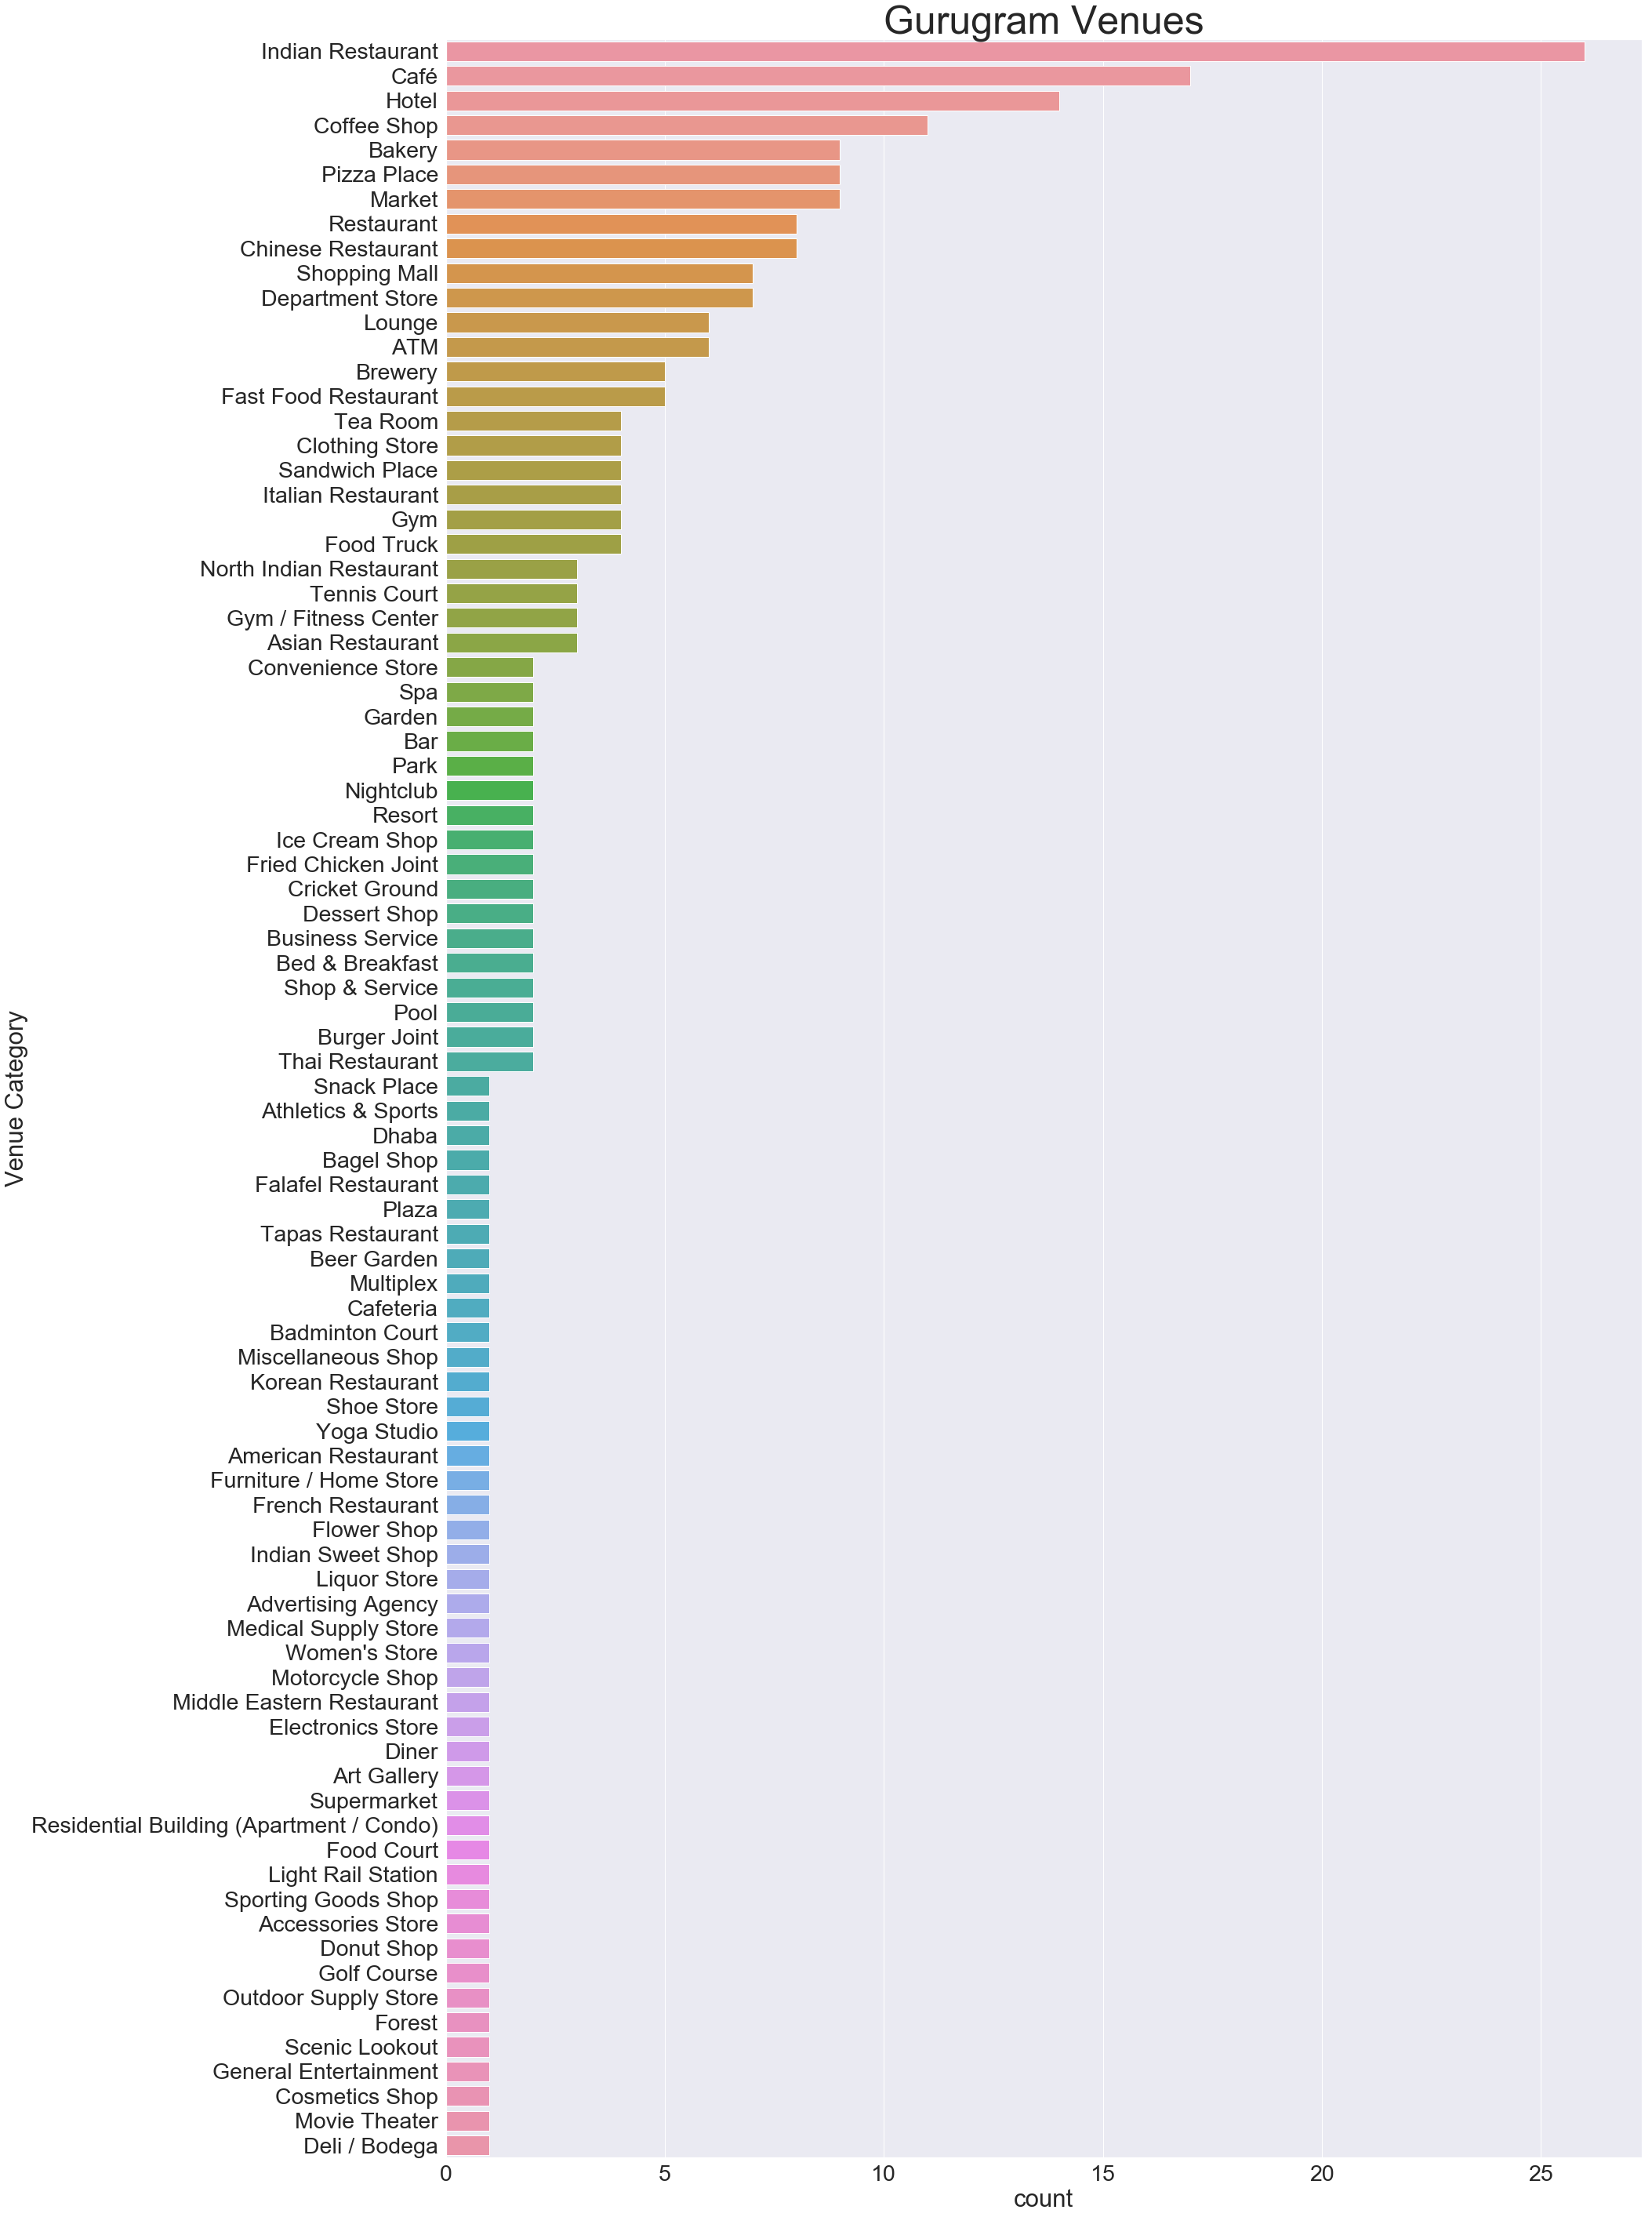

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2.6)
#fig, ax = plt.subplots()
plt.figure(figsize=(30,40))
plt.title("Gurugram Venues", fontsize=50)
sns.countplot(y="Venue Category",data=noida_venues, order=noida_venues["Venue Category"].value_counts().index)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)
plt.tight_layout()
plt.savefig("output_gurugram.png")

In [130]:
map_clusters.save("gurugram.html")

In [131]:
n1=noida_venues["Venue Category"]

In [132]:
n1.to_frame().to_csv("guru_venue_category.csv", index=False)